In [ ]:
import pandas as pd

# Replace 'filename.csv' with your actual file name
drugdf = pd.read_csv('drug_consumption.csv')

# Rename columns
drugdf.columns = [
    'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
    'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
    'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol',
    'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis',
    'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
    'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA'
]

In [ ]:
# set data index

data = drugdf.copy()

data.set_index('ID', inplace = True)

**Creating the pleiad groups for drugs because in most of the databases the classes of users and non-users for most of the individual drugs are imbalanced. But the idea of merging the users of all drugs in one class "drug users" does not seem to be the best solution because of physiological, psychological and cultural differences between usage of different drugs. Instead, I have decided to use correlation pleiades for the analysis of drug usage as a solution to the class imbalance problem because for all three pleiades the classes of users and non-users are better balanced.**

The Heroin pleiad (heroinPl) includes crack, cocaine, methadone, and heroin.

The Ecstasy pleiad (ecstasyPl) includes amphetamines, cannabis, cocaine, ketamine, LSD, magic mushrooms, legal highs, and ecstasy.

The Benzodiazepines pleiad (benzoPl) includes contains methadone, amphetamines, and cocaine

**Discriminating participants into groups of users and non-users for binary classification.**

Analysis of the classes of drug users shows that part of the classes are nested: participants which belong to the category ‘Used in last day’ also belong to the categories ‘Used in last week’, ‘Used in last month’, ‘Used in last year’ and ‘Used in last decade’. There are two special categories: ‘Never used’ and ‘Used over a decade ago’ . The article also says that formally only a participant in the class ‘Never used’ can be called a non-user, but it is not a seminal definition because a participant who used a drug more than decade ago cannot be considered a drug user for most applications. And I completely agree with this statement.

The categories ‘Used in last week’ and ‘Used in last month’ are merged to form a group of users and all other categories are placed into the group of non-users. This classification problem is called ‘week-based’.

I preferred to choose the week-based concept, as I tend to build a prediction model more on the weekly and month relevance of information, as we are with this method more likely to identify really people who use drugs, rather than those who just tried them.

In [ ]:
# Creating rough version of classification of drug consumption. Modifing my existing `data` object:
# 1 - if a person used a drug in month, week or day, then let's say that he did consume a drug.

# 0 - other categories are placed into the group that he did not consume a drug;

def change(a):

    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') ):
        a = 1

    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') or (a == 'CL3')):
        a = 0

    return a


# Applying our changes in classification of drug consumption to columns with drugs

data['Amphetamine'] = data['Amphetamine'].map(change)

data['Amyl_nitrite'] = data['Amyl_nitrite'].map(change)

data['Benzodiazepine'] = data['Benzodiazepine'].map(change)

data['Cannabis'] = data['Cannabis'].map(change)

data['Cocaine'] = data['Cocaine'].map(change)

data['Crack'] = data['Crack'].map(change)

data['Ecstasy'] = data['Ecstasy'].map(change)

data['Heroin'] = data['Heroin'].map(change)

data['Ketamine'] = data['Ketamine'].map(change)

data['LSD'] = data['LSD'].map(change)

data['Methadone'] = data['Methadone'].map(change)

data['Mushrooms'] = data['Mushrooms'].map(change)

data['Semeron'] = data['Semeron'].map(change)

data['VSA'] = data['VSA'].map(change)

data['Alcohol'] = data['Alcohol'].map(change)

data['Legal_highs'] = data['Legal_highs'].map(change)

data['Nicotine'] = data['Nicotine'].map(change)

data['Chocolate'] = data['Chocolate'].map(change)

data['Caffeine'] = data['Caffeine'].map(change)

In [ ]:
#The Heroin pleiad (heroinPl) includes crack, cocaine, methadone, and heroin.

data['heroinPl'] = data.apply(lambda x: int((x['Cocaine'] + x['Crack'] + x['Heroin'] + x['Methadone'])>0), axis = 1)

#The Ecstasy pleiad (ecstasyPl) includes amphetamines, cannabis, cocaine, ketamine,
# LSD, magic mushrooms, legal highs, and ecstasy.

data['ecstasyPl'] = data.apply(lambda x: int((x['Amphetamine']  + x['Cannabis'] + x['Cocaine']  + x['Ecstasy'] + x['Ketamine'] + x['LSD'] + x['Methadone'] + x['Mushrooms'] )>0), axis = 1)

#The Benzodiazepines pleiad (benzoPl) includes contains methadone, amphetamines, and cocaine.

data['benzoPl'] = data.apply(lambda x: int((x['Amphetamine'] + x['Cocaine'] + x['Methadone'])>0), axis = 1)

#Drop columns

data.drop(['Caffeine','Chocolate','Nicotine','Legal_highs','Alcohol','Amphetamine','Amyl_nitrite','Benzodiazepine', 'Cannabis', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Methadone', 'Mushrooms', 'Semeron', 'VSA'], axis = 1, inplace = True)


**decoding categorical features such as ethnicity, education, country, gender and age**

In [ ]:
#There is a problem with float64 values in dataset. I converted values to  .f5
#Because if you see the number 0.86054, for example, then its not what it is actually.
#It can be 0.8605400000001. That's why the comparison does not work

def toFixed(x):
    x = float('{:.5f}'.format(x))
    return x

for i in list(data.columns):
    data[i] = data[i].map(toFixed)

#Decode column Age

#'18-24' age -> 0
#'25-34' age -> 1
#'35-44' age -> 2
#'45-54' age -> 3
#'55-64' age -> 4
#'65+'   age -> 5

def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

data['Age'] = data['Age'].map(changeAge)

#Decode Gender

# Female -> 0
# Male   -> 1

def changeGender(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

data['Gender'] = data['Gender'].map(changeGender)

#Decode Education

# Left school before 16 years                          -> 0
# Left school at 16 years                              -> 1
# Left school at 17 years                              -> 2
# Left school at 18 years                              -> 3
# Some college or university, no certificate or degree -> 4
# Professional certificate/ diploma                    -> 5
# University degree                                    -> 6
# Masters degree                                       -> 7
# Doctorate degree                                     -> 8

def changeEducation(x):

  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x

data['Education'] = data['Education'].map(changeEducation)

#Decode country

#Australia -> 0
#Canada    -> 1
#New Zealand->2
#Other     -> 3
#Republic of Ireland ->4
#UK         ->5
#USA        ->6

def changeCountry(x):

  if (x == -0.09765):
    x = 0
  elif (x == 0.24923):
    x = 1
  elif (x == -0.46841):
    x = 2
  elif (x == -0.28519):
    x = 3
  elif (x == 0.21128):
    x = 4
  elif (x == 0.96082):
    x = 5
  elif (x == -0.57009):
    x = 6
  return x

data['Country'] = data['Country'].map(changeCountry)

#Decode Ethnicity

#Asian  -> 0
#Black  -> 1
#Mixed-Black/Asian -> 2
#Mixed-White/Asian -> 3
#Mixed-White/Black -> 4
#Other             -> 5
#White             -> 6

def changeEthnicity(x):

  if (x == -0.50212):
    x = 0
  elif (x == -1.10702):
    x = 1
  elif (x == 1.90725):
    x = 2
  elif (x == 0.12600):
    x = 3
  elif (x == -0.22166):
    x = 4
  elif (x == 0.11440):
    x = 5
  elif (x == -0.31685):
    x = 6
  return x

data['Ethnicity'] = data['Ethnicity'].map(changeEthnicity)

the dataset has not enough data for most of ethnicities and countries to prove the value of this information. It is impossible to completely exclude the possibility that ethnicity and country of residence may be important risk factors, but I believe that they will not help us in any way in the classification and they can be excluded.

In [ ]:
# Create a correlation matrix

# We separate target columns and create 3 new dataset variable

data1 = data.drop(['ecstasyPl', 'benzoPl'], axis=1)
data2= data.drop(['heroinPl', 'benzoPl'], axis=1)
data3= data.drop(['heroinPl', 'ecstasyPl'], axis=1)

corr1 = data1.corr()
corr2 = data2.corr()
corr3 = data3.corr()

#Removing non-useful features from dataset

data1 = data1.drop(['Ethnicity', 'Country'], axis=1)
data2 = data2.drop(['Ethnicity', 'Country'], axis=1)
data3 = data3.drop(['Ethnicity', 'Country'], axis=1)

#Seeing if dataset is balanced or not
print('People who did not use any heroinPl drug:', float('{:.3f}'.format(1 - data1.heroinPl.sum()/1885)), '%')
print('People who did use any heroinPl drug:', float('{:.3f}'.format(data1.heroinPl.sum()/1885)), '%')
print('People who did not use any ecstasyPl drug:', float('{:.3f}'.format(1 - data2.ecstasyPl.sum()/1885)), '%')
print('People who did use any ecstasyPl drug:', float('{:.3f}'.format(data2.ecstasyPl.sum()/1885)), '%')
print('People who did not use any benzoPl drug:', float('{:.3f}'.format(1 - data3.benzoPl.sum()/1885)), '%')
print('People who did use any benzoPl drug:', float('{:.3f}'.format(data3.benzoPl.sum()/1885)), '%')

People who did not use any heroinPl drug: 0.836 %
People who did use any heroinPl drug: 0.164 %
People who did not use any ecstasyPl drug: 0.505 %
People who did use any ecstasyPl drug: 0.495 %
People who did not use any benzoPl drug: 0.776 %
People who did use any benzoPl drug: 0.224 %


The dataset is a bit imbalanced on benzoPl target, imbalanced on heroinPl target and balanced on ecstasyPl target.

Selection of evaluation metric also plays a very important role in model selection. Accuracy never helps in imbalanced dataset. Three classification scenarios for four different metrics: accuracy, sensitivity, precision and F1.

Accuracy measures the proportion of correct predictions but can be misleading—especially in imbalanced datasets. For example, if drug use is rare, predicting everyone as negative yields high accuracy but provides no real insight.

To understand false negatives, sensitivity (or recall/true positive rate) measures the proportion of actual positives correctly identified. However, it ignores false positives, so a model that predicts all cases as positive would still have high sensitivity.

In drug use prediction, it's crucial to minimize both false positives and false negatives. Mislabeling non-users can cause unnecessary stress or treatment, while missing true users gives a false sense of security.

The Fβ score balances precision and recall. When β = 1, it becomes the F1 score, which weighs both equally:
F1 = 2TP / (2TP + FP + FN).

No single metric captures all aspects of a model’s performance, but in this case, identifying positives is especially important. Therefore, I will use the F1 score, with a close eye on recall, since precision also matters to avoid overpredicting positives. THIS IS SUPPORTED FROM A PREVIOUS CODER. Two of the three target data 2 out of 3 target variables are imbalanced.

The feasibility of predicting drug use varies based on the substance in question. Predicting ecstasy use appears more feasible due to the following reasons:
- The classes are balanced, making the model training process more straightforward.
- The problem is relatively simple, which allows for effective model development.
- The available features provide a strong enough signal for the model to perform well.
- Metrics and performance graphs indicate that the model shows reliable and robust behavior.

However, predicting heroin and benzodiazepine use presents more challenges. The small sample sizes limit the complexity of the models, and the class imbalance or lack of user representation weakens the predictions. Additionally, some features may not be as informative for these harder-to-predict substances.


Despite these limitations, I plan to build models for heroin and benzodiazepine as well use in order to explore potential patterns and signals.

Next, we can explore correlations between different drug types, such as whether heroin use is correlated with benzodiazepine or ecstasy use. This could reveal patterns of co-use or exclusive-use.

Another key area of interest is the exploration of psychological and social patterns. We will investigate how traits like impulsivity, anxiety, and openness relate to different types of drug use, aiming to determine whether users of different substances have distinct psychological profiles.

**THE START OF MY ANALYSES**

Feature Testing Between Users and Non-Users

Purpose: Statistically test which features differ significantly between users and non-users of a given drug pleiad (target like ecstasyPl).

This helps identify which features are most statistically different between the two groups and worth exploring further or including in a model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Function to perform t-tests for continuous and chi-square for categorical features
def feature_tests(data, target):
    results = []
    for col in data.columns:
        if col == target or data[col].nunique() == 1:
            continue
        if data[col].dtype in [np.float64, np.int64]:
            group1 = data[data[target] == 1][col]
            group0 = data[data[target] == 0][col]
            t_stat, p_val = ttest_ind(group1, group0)
            results.append((col, 't-test', p_val))
        else:
            contingency = pd.crosstab(data[col], data[target])
            _, p_val, _, _ = chi2_contingency(contingency)
            results.append((col, 'chi-square', p_val))
    return pd.DataFrame(results, columns=['Feature', 'Test', 'p-value']).sort_values('p-value')

# Example for ecstasyPl
print("\nStatistical test results for ecstasyPl:")
print(feature_tests(data, 'ecstasyPl'))


Statistical test results for ecstasyPl:
              Feature    Test        p-value
13            benzoPl  t-test  2.260193e-144
11  Sensation_seeking  t-test   2.659021e-89
12           heroinPl  t-test   5.067814e-88
0                 Age  t-test   5.036025e-83
7            Openness  t-test   1.034531e-62
10      Impulsiveness  t-test   6.066416e-43
1              Gender  t-test   3.770880e-40
9   Conscientiousness  t-test   2.375827e-34
2           Education  t-test   1.095582e-29
8       Agreeableness  t-test   1.801990e-13
5         Neuroticism  t-test   2.513269e-05
4           Ethnicity  t-test   3.771671e-03
6        Extraversion  t-test   1.826454e-01
3             Country  t-test   6.605663e-01


Conclusions:
- Ecstasy use is **strongly associated with other drug use (especially benzos and heroin), sensation seeking, impulsivity, and openness to experience.**
- There's also **clear demographic influence: age, gender, and education matter.**
- Traits like extraversion and country of origin don’t seem to affect ecstasy use significantly

Next Steps To Take
- Use the top significant features in logistic regression model.
- Try a correlation heatmap to explore relationships between the top variables and ecstasyPl.

Correlation Between Drug Types

Purpose: Understand how usage of different drug pleiads is related.

Uses a correlation matrix and heatmap to visualize linear relationships.

if drug use groups are highly correlated, it may imply a behavioral or contextual overlap.

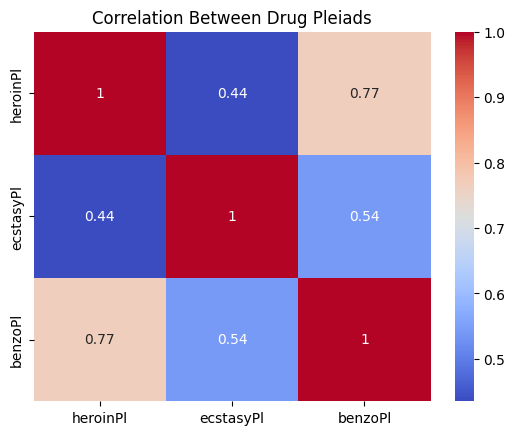

In [ ]:
drug_corr = data[['heroinPl', 'ecstasyPl', 'benzoPl']].corr()
sns.heatmap(drug_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Drug Pleiads")
plt.show()

Conclusions:
- The strongest correlation is between heroinPI and benzoPI (0.77), indicating a substantial positive relationship. This suggests that individuals with higher heroin use tendencies are also more likely to have higher benzodiazepine use tendencies (or vice versa).

- ecstasyPI and benzoPI have a correlation of 0.54, showing a moderate positive relationship.

- heroinPI and ecstasyPI have the weakest correlation (0.44), but it is still positive and non-negligible.

Logistic Regression Modeling

Build and evaluate a predictive model to distinguish users from non-users of a drug pleiad using demographic and psychological features.

How it works:

- Splits data into training and test sets.
- Fits a logistic regression (good baseline model, interpretable).
- Evaluates with:
  - Classification report (precision, recall, F1-score)
  - ROC-AUC score (overall model quality)
- Plots feature coefficients, which serve as importance weights in logistic regression.

This will help understand which features are driving predictions, and build a simple, explainable predictive model.


Model Evaluation for heroinPl:

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       321
         1.0       0.62      0.09      0.16        56

    accuracy                           0.86       377
   macro avg       0.74      0.54      0.54       377
weighted avg       0.83      0.86      0.81       377

ROC-AUC: 0.7868268802848242


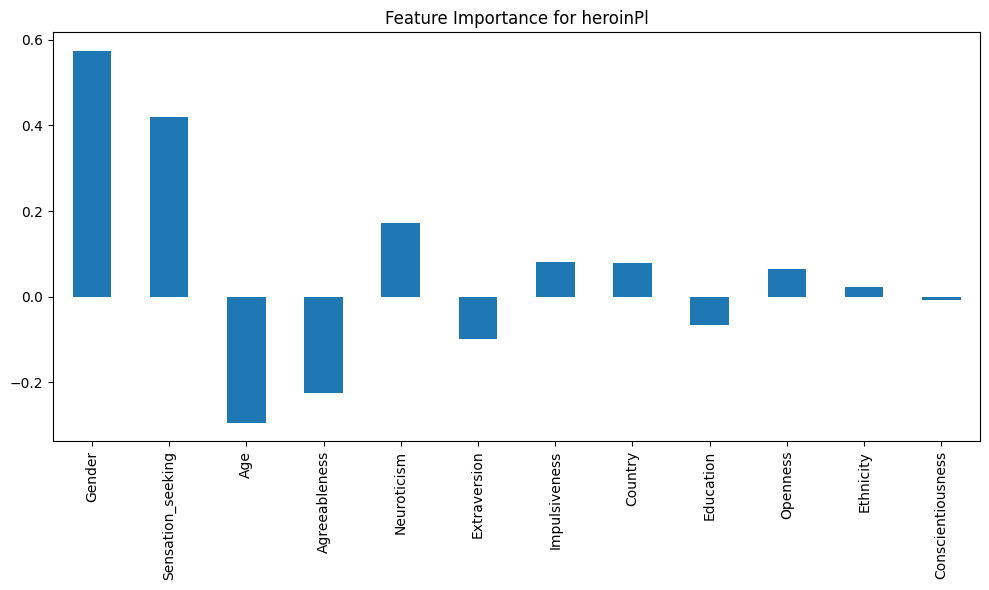


Model Evaluation for ecstasyPl:

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       200
         1.0       0.75      0.81      0.78       177

    accuracy                           0.79       377
   macro avg       0.79      0.79      0.79       377
weighted avg       0.79      0.79      0.79       377

ROC-AUC: 0.8624293785310736


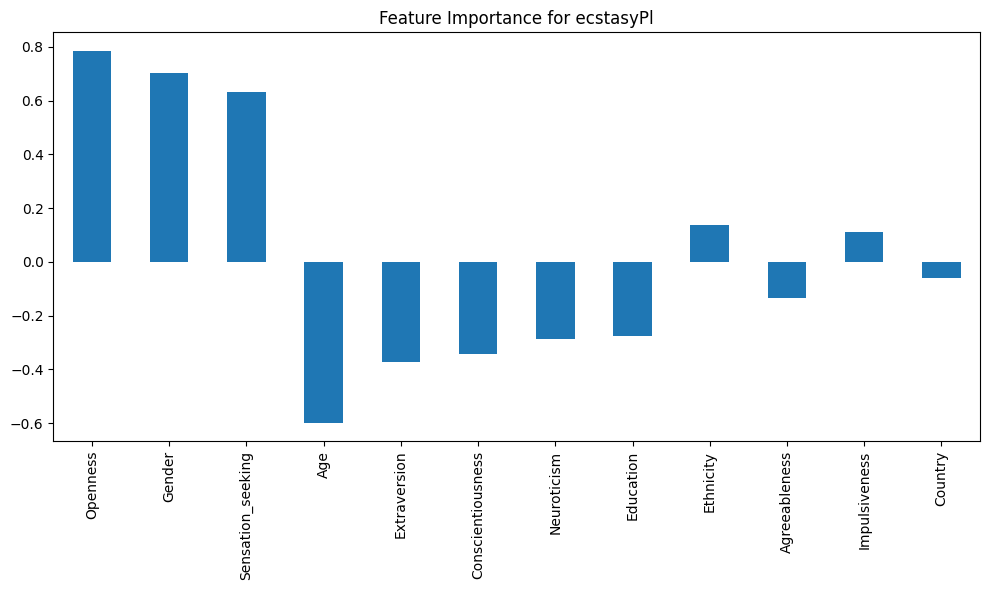


Model Evaluation for benzoPl:

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       306
         1.0       0.47      0.23      0.30        71

    accuracy                           0.81       377
   macro avg       0.66      0.58      0.60       377
weighted avg       0.77      0.81      0.78       377

ROC-AUC: 0.790481450796281


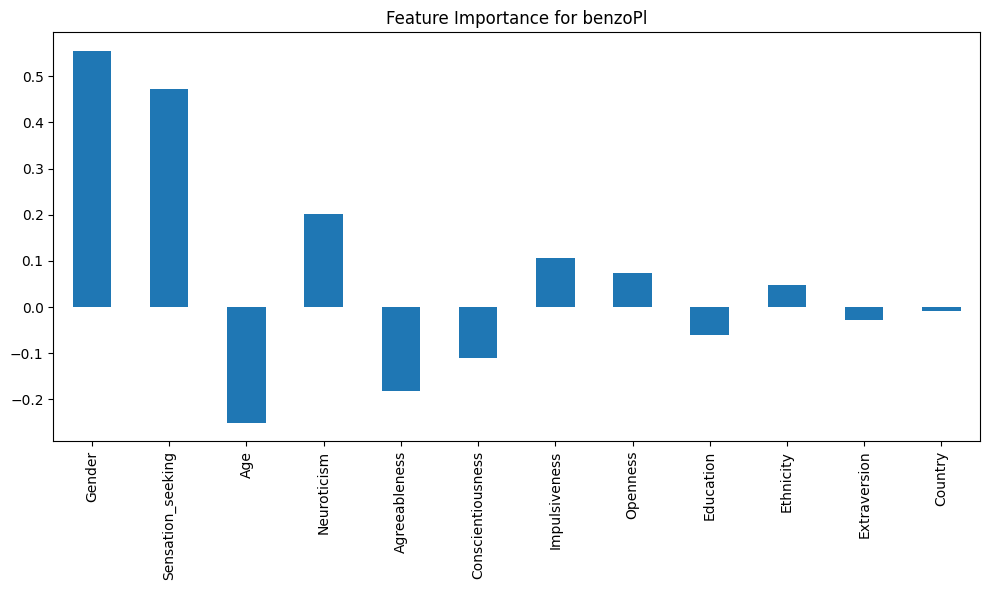

In [ ]:
def logistic_model(data, target):
    X = data.drop(columns=['heroinPl', 'ecstasyPl', 'benzoPl', target])
    y = data[target]

    # Logistic Regression Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(f"\nModel Evaluation for {target}:\n")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Feature Importance
    coeffs = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
    plt.figure(figsize=(10, 6))
    coeffs.plot(kind='bar')
    plt.title(f"Feature Importance for {target}")
    plt.tight_layout()
    plt.show()

# Run for all pleiads
logistic_model(data, 'heroinPl')
logistic_model(data, 'ecstasyPl')
logistic_model(data, 'benzoPl')

**CONCLUSION**

The evaluation results for the model predicting ecstasyPl indicate that it performs quite well overall. It is a binary classification task, distinguishing between classes labeled 0.0 (non-user) and 1.0 (user). For class 0.0, the model achieved a precision of 0.82, meaning 82% of the time it predicted 0.0, it was correct. Its recall for this class was 0.77, correctly identifying 77% of all actual 0.0 cases. The F1-score, which balances precision and recall, was 0.79. For class 1.0, the precision was 0.75, recall was 0.81, and the F1-score was 0.78, indicating similarly strong performance. The overall accuracy of the model is 0.79, meaning it correctly classified 79% of the 377 total samples. Both the macro and weighted averages of precision, recall, and F1-score are also 0.79, suggesting the model handles class imbalance reasonably well. Additionally, the ROC-AUC score is 0.86, which reflects a strong ability to distinguish between the two classes. In summary, the model shows a balanced and reliable performance, with especially promising results in its ROC-AUC score.

Traits like Openness, Gender, and Sensation Seeking are the strongest positive predictors of ecstasy use, while Age and certain personality traits (like Conscientiousness) act as deterrents.